In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
# makes inline plots to have better quality
%config InlineBackend.figure_format = 'svg'

# Set the default style
plt.style.use("seaborn")

# 1. Loading the dataset, exploring data, handling missing values

In [14]:
#Loading the dataset
df = pd.read_csv('crx.data', delimiter=",", header=None, na_values=["?"])

In [15]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


This is a dataset from the UCI Machine Learning repository. So we can check the information about the dataset on the [official page](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). As it mentioned in the dataset description, all attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. Therefore, we don't know what the features mean.

In [16]:
#Renaming data columns
names = ['a1','a2','a3','a4','a5','a6',
         'a7','a8','a9','a10','a11','a12',
         'a13','a14','a15','approved']

df.columns = names

### 1.1 Handling missing values

In [17]:
df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [18]:
# Checking the number of instances for every class
df['approved'].value_counts()

-    383
+    307
Name: approved, dtype: int64

In [19]:
#Checking statistics of the numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a2,678.0,31.568171,11.957862,13.75,22.6025,28.46,38.2300,80.25
a3,690.0,4.758725,4.978163,0.00,1.0000,2.75,7.2075,28.00
a8,690.0,2.223406,3.346513,0.00,0.1650,1.00,2.6250,28.50
a11,690.0,2.400000,4.862940,0.00,0.0000,0.00,3.0000,67.00
a14,677.0,184.014771,173.806768,0.00,75.0000,160.00,276.0000,2000.00
a15,690.0,1017.385507,5210.102598,0.00,0.0000,5.00,395.5000,100000.00


In [20]:
#Checking the number of missing values in the dataset
print(df.isnull().values.sum())

67


In [21]:
#Checking what features contain missing values
df.isnull().sum()

a1          12
a2          12
a3           0
a4           6
a5           6
a6           9
a7           9
a8           0
a9           0
a10          0
a11          0
a12          0
a13          0
a14         13
a15          0
approved     0
dtype: int64

In [22]:
#checking the columns datatypes
df.dtypes

a1           object
a2          float64
a3          float64
a4           object
a5           object
a6           object
a7           object
a8          float64
a9           object
a10          object
a11           int64
a12          object
a13          object
a14         float64
a15           int64
approved     object
dtype: object

Features a1, a2, a4-a7, a14 contain missing values. We can try to expect these columns and handle the missing values.

Attributes a2 and a14 are numeric and we can impute missing values with the column mean. Attributes a1, a4-a7 are categorical, and it (probably) makes sense to impute the missing values with the most frequent values in these columns.

In [23]:
#imputing missing values with the column mean value
df['a2'].fillna(df['a2'].mean(), inplace=True)
df['a14'].fillna(df['a14'].mean(), inplace=True)

In [24]:
#imputing missing values in categorical columns with the most frequent values
columns_with_nans = ['a1','a4','a5','a6','a7']

for col in columns_with_nans:
    df[col] = df[col].fillna(df[col].value_counts().index[0])

In [25]:
#Checking the number of missing values in the dataset
print(df.isnull().values.sum())

0


### 1.2 Feature exploration

In [26]:
df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


#### Target

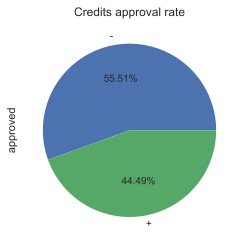

In [27]:
df['approved'].value_counts().plot(kind='pie', figsize =(4,4), title='Credits approval rate', autopct='%0.2f%%')
plt.show()

More than half of the applications have not been approved. 

#### Feature a1

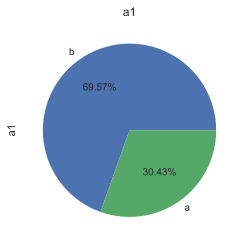

In [28]:
df['a1'].value_counts().plot(kind='pie', figsize =(4,4), title='a1', autopct='%0.2f%%')
plt.show()

This feature may be a gender of the clients

#### Feature a2, a3, a8, a14

Exploring features with float dtype

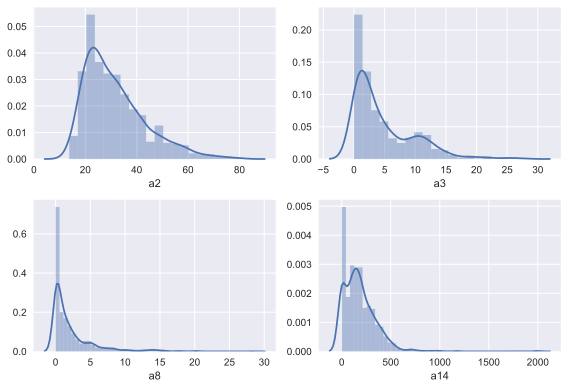

In [29]:
fig, axs = plt.subplots(2, 2)
sns.distplot(df['a2'], ax=axs[0,0])
sns.distplot(df['a3'], ax=axs[0,1])
sns.distplot(df['a8'], ax=axs[1,0])
sns.distplot(df['a14'], ax=axs[1,1])
fig.tight_layout()
plt.show()

Range of feature a1 is from 13 to ~80. Looks like an age of the candidates

#### Features a4-a7, a9-a13

Exploring categorical features

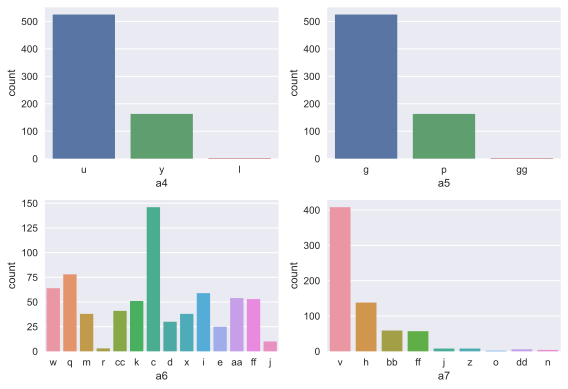

In [30]:
fig, axs = plt.subplots(2, 2)
sns.countplot(x='a4', data=df, ax=axs[0,0])
sns.countplot(x='a5', data=df, ax=axs[0,1])
sns.countplot(x='a6', data=df, ax=axs[1,0])
sns.countplot(x='a7', data=df, ax=axs[1,1])
fig.tight_layout()
plt.show()

Features a4 and a5 looks very alike, probably highly correlated

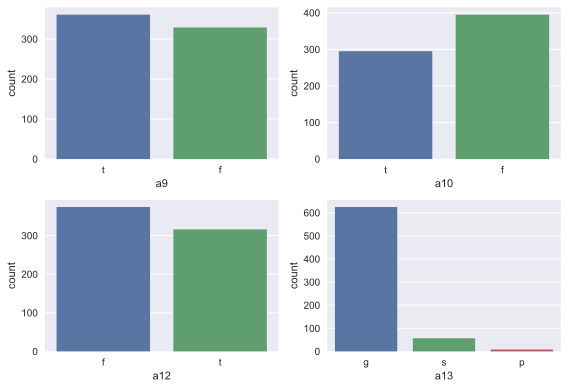

In [31]:
fig, axs = plt.subplots(2, 2)
sns.countplot(x='a9', data=df, ax=axs[0,0])
sns.countplot(x='a10', data=df, ax=axs[0,1])
sns.countplot(x='a12', data=df, ax=axs[1,0])
sns.countplot(x='a13', data=df, ax=axs[1,1])
fig.tight_layout()
plt.show()

#### Features a11, a15

Exploring features with integer dtype

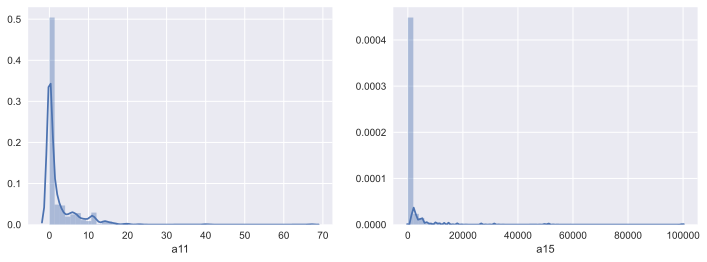

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.distplot(df['a11'], ax=axs[0])
sns.distplot(df['a15'], ax=axs[1])

### 1.3 Data encoding and feature correlations

In [33]:
#encode the categorical columns
#and save the encoders to use it later
le = LabelEncoder()
encoders = {}

for col in df.columns:
    #check the column datatype
    if df[col].dtype=='object':
        #transform the column
        df[col]=le.fit_transform(df[col])
        #save fitted encoder
        encoders[col] = le

In [34]:
encoders

{'a1': LabelEncoder(),
 'a4': LabelEncoder(),
 'a5': LabelEncoder(),
 'a6': LabelEncoder(),
 'a7': LabelEncoder(),
 'a9': LabelEncoder(),
 'a10': LabelEncoder(),
 'a12': LabelEncoder(),
 'a13': LabelEncoder(),
 'approved': LabelEncoder()}

In [35]:
df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0


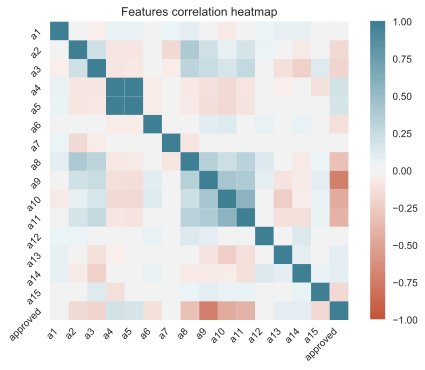

In [36]:
#create heatmap of the feature correlations
corr_matrix = df.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.title('Features correlation heatmap')
plt.show()

Features a4 and a5 are highly correlated.

In [37]:
df['a4'].corr(df['a5'])

0.9822569937386043

In [38]:
df['a9'].corr(df['approved'])

-0.7204068158989534

In [39]:
#drop one of the highly correlated features
df.drop(columns=['a4'], inplace=True)

In [40]:
df.head()

,a1,a2,a3,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,approved
0,1,30.83,0.000,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,0,12,7,1.71,1,0,0,0,2,120.0,0,0


## 2. Linear model

First, split the data into train and test sets to measure quality of the models

In [41]:
#splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['approved']),
                                                    df['approved'], test_size=0.2, 
                                                    random_state=100)

In [42]:
X_train.shape

(552, 14)

In [43]:
y_train.shape

(552,)

In [44]:
X_test.shape

(138, 14)

In [45]:
y_test.shape

(138,)

The data has very different range, so it can be helpful to scale the features.

In [46]:
scaler = StandardScaler()

In [47]:
#scaling the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Training linear model

Features in the dataset are changed to meaningless symbols and we don't know what these features actually represent. However, we can assume that the features could be gender, age, salary, debt, marital status, etc. The plots above confirm that (for example, feature a1 looks like gender). So we can assume that the features are correlated with each other (we also checked the correlation using the heatmap). Therefore, it makes sense to try a generalized linear model such as logistic regression.

In [48]:
#logistic regression with default parameters
lr = LogisticRegression(random_state=10)

In [49]:
lr.fit(X_train_scaled,y_train)

LogisticRegression(random_state=10)

In [50]:
print('Train accuracy: ', accuracy_score(y_train, lr.predict(X_train_scaled)))
print('Test accuracy: ', accuracy_score(y_test, lr.predict(X_test_scaled)))

Train accuracy:  0.8858695652173914
Test accuracy:  0.8188405797101449


## 3. Non-linear model

The next model to try is the k-nearest neighbors classifier. It is a non-linear model and I think, it makes sense to try this model because can be rejected or approved based on their similarity. For example, all the people with low income and big debt are probably won't be approved.

In [51]:
#knn classifier with default parameters
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [53]:
print('Train accuracy: ', accuracy_score(y_train, knn.predict(X_train_scaled)))
print('Test accuracy: ', accuracy_score(y_test, knn.predict(X_test_scaled)))

Train accuracy:  0.9003623188405797
Test accuracy:  0.8260869565217391


KNN classifier with default parameters gave a little bit better train and test accuracy.

## 4. Ensemble model

We checked how the linear and non-linear models perform on these data. Now, we can try to improve the results by combining the models. Let's try voting classifier with soft voting that compare the predicted class probabilities to choose the best class.

In [54]:
clf1 = LogisticRegression(random_state=10)
clf2 = KNeighborsClassifier()

voting = VotingClassifier(estimators=[('lr', clf1), ('knn', clf2)], voting='soft')

In [55]:
voting.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=10)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [56]:
print('Train accuracy: ', accuracy_score(y_train, voting.predict(X_train_scaled)))
print('Test accuracy: ', accuracy_score(y_test, voting.predict(X_test_scaled)))

Train accuracy:  0.9003623188405797
Test accuracy:  0.8333333333333334


Test accuracy improved a bit. Thus, voting classifier that combines the results of linear and non-linear models, gave the best scores.

## 5. Credit approval function

In [57]:
def credit_approval(row, model, encoders):   
    """
    Takes encoded data row;
    Predicts if the application will be approved 
    """
    result = model.predict([row])
    decoded_result = encoders['approved'].inverse_transform(result)[0]
    
    if decoded_result == "+":
        return "Approved"
    else:
        return "Not approved"

#### Example

In [58]:
#data row
row = X_test.iloc[109]

In [59]:
print(row)

a1       1.000
a2      42.750
a3       4.085
a5       0.000
a6       0.000
a7       7.000
a8       0.040
a9       0.000
a10      0.000
a11      0.000
a12      0.000
a13      0.000
a14    108.000
a15    100.000
Name: 341, dtype: float64


In [60]:
credit_approval(row, voting, encoders)

'Approved'

****************

In [61]:
#data row
row2 = X_test.iloc[0]

In [62]:
print(row2)

a1      1.00
a2     37.33
a3      6.50
a5      0.00
a6      9.00
a7      3.00
a8      4.25
a9      1.00
a10     1.00
a11    12.00
a12     1.00
a13     0.00
a14    93.00
a15     0.00
Name: 152, dtype: float64


In [63]:
credit_approval(row2, voting, encoders)

'Not approved'